In [65]:
import numpy as np
import pandas as pd
import requests
from PIL import Image
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MeanShift, OPTICS

In [2]:
path = r'./Chungking-Express-14.jpg'

In [3]:
def online_image_loader(url):
    response = requests.get(url, stream=True).raw
    try:
        image = Image.open(response)
    except:
        raise Exception('Image not found, try another URL')  
    return image

In [4]:
def local_image_loader(path):
    try:
        image = Image.open(path)
    except:
        raise Exception('Image not found, try another path')
    return image

In [5]:
def flatten_image(image):
    df = pd.DataFrame(list(image.getdata()),columns=list(image.getbands()))
    return df

In [6]:
url = input('Enter image url: ')
img_local = local_image_loader(path)
img_online = online_image_loader(url)

In [7]:
flat_local = flatten_image(img_local)
flat_online = flatten_image(img_online)

In [28]:
class Clusterer():
    def __init__(self, df):
        self.df = df
        self.models = {}

    """ 
    KMeans, 
    MiniBatchKMeans, 
    DBSCAN, 
    AgglomerativeClustering, 
    SpectralClustering,  
    Birch, 
    MeanShift, 
    OPTICS 
    """

    def KM(self):
        self.models['KMeans'] = KMeans(n_clusters=8,n_init='auto').fit(self.df)
        return self.models['KMeans']
    
    def MBKM(self):
        self.models['MiniBatchKMeans'] = MiniBatchKMeans(n_clusters=8).fit(self.df)
        return self.models['MiniBatchKMeans']
    
    def DB(self):
        self.models['DBSCAN'] = DBSCAN().fit(self.df)
        return self.models['DBSCAN']
    
    def AC(self):
        self.models['AgglomerativeClustering'] = AgglomerativeClustering(n_clusters=8).fit(self.df)
        return self.models['AgglomerativeClustering']
    
    def SC(self):
        self.models['SpectralClustering'] = SpectralClustering(n_clusters=8).fit(self.df)
        return self.models['SpectralClustering']
    
    def B(self):
        self.models['Birch'] = Birch(n_clusters=8).fit(self.df)
        return self.models['Birch']
    
    def MS(self):
        self.models['MeanShift'] = MeanShift().fit(self.df)
        return self.models['MeanShift']
    
    def O(self):
        self.models['OPTICS'] = OPTICS().fit(self.df)
        return self.models['OPTICS']
    

In [54]:
def rgb_to_hex(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [29]:
kmeans_model = Clusterer(flat_local).KM()

In [36]:
def generate_rgb_palette(model):
    palette = model.cluster_centers_.round(0).astype(int)
    return palette

In [61]:
def generate_hex_palette(rgb_palette):
    hex_palette = np.apply_along_axis(rgb_to_hex, 1, rgb_palette)
    return hex_palette

In [70]:
hex_colors = generate_hex_palette(generate_rgb_palette(kmeans_model))
hex_colors

array(['#702603', '#150c05', '#953203', '#5c7e02', '#c54603', '#301a02',
       '#dcba1a', '#4f1b02'], dtype='<U7')

In [69]:
def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

In [72]:
rgb_colors = list(map(hex_to_rgb, hex_colors))

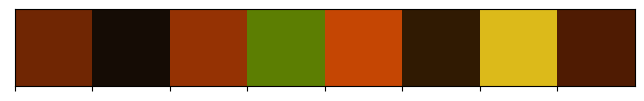

In [73]:
sns.palplot(rgb_colors)